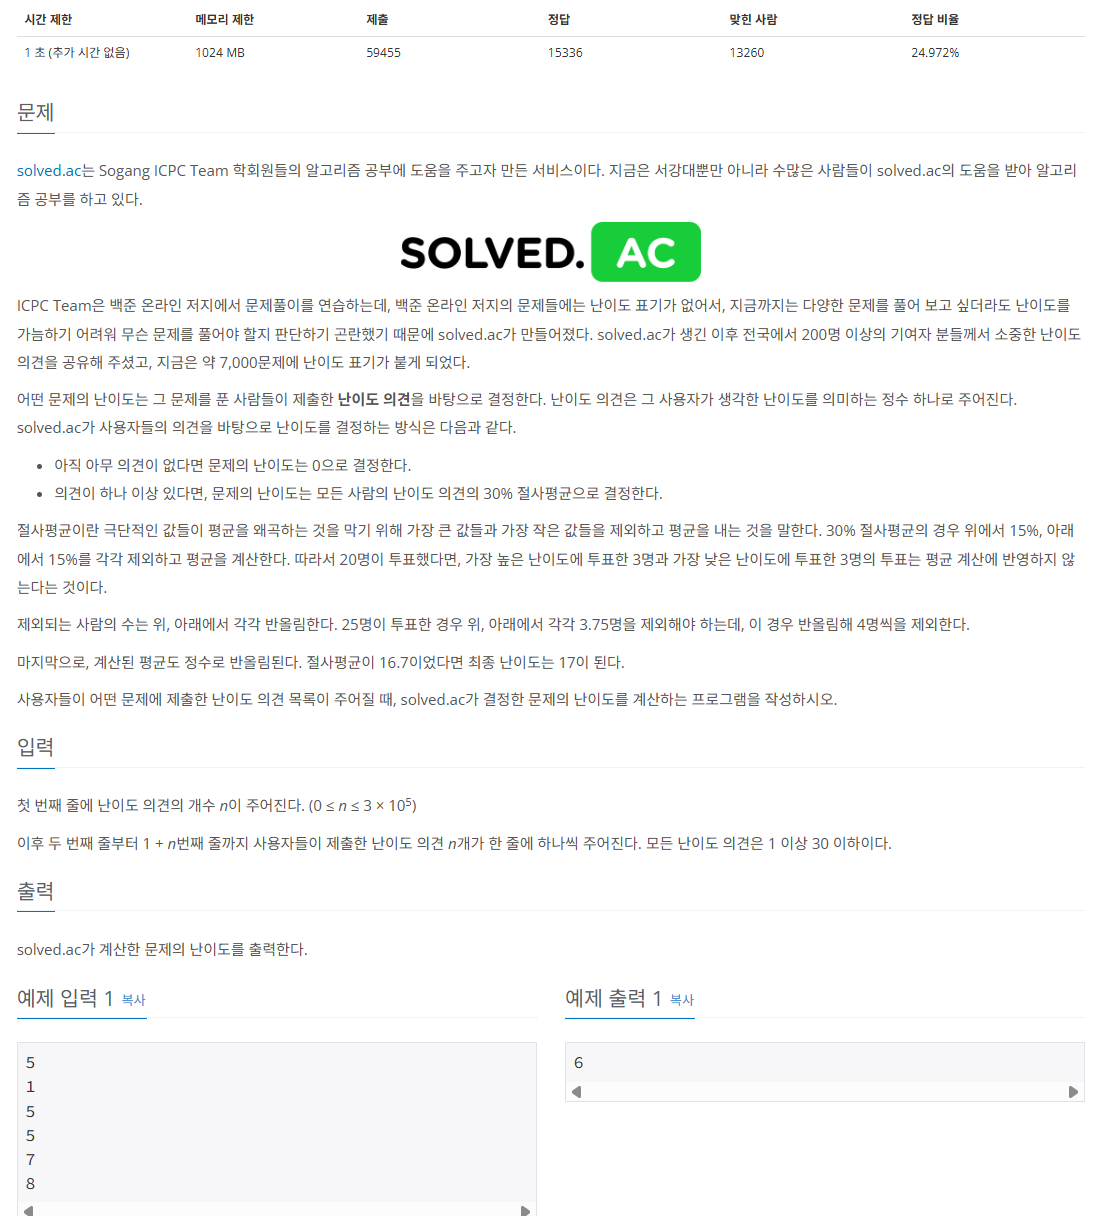

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-07-24 034447.png")
img

In [ ]:
import sys
from collections import deque
n=int(sys.stdin.readline())

diff_lvl=[int(sys.stdin.readline()) for _ in range(n)]
diff_lvl.sort()
dq=deque(diff_lvl)

target_idx=int(n*0.15 + 0.5)

for _ in range(target_idx):
    dq.pop()
    dq.popleft()

divider=n-(2*target_idx)

if n!=0:
    print(int(sum(dq)/divider + 0.5))
else:
    print(0)

13




-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.8 / 5.0 점**

      * **평가:** **만점에 가까운 완벽한 정답입니다.** 문제의 모든 요구사항(정렬, 절사, 평균, 반올림)을 올바르게 구현했으며, `deque`를 사용한 방식도 효율적으로 동작합니다. 특히 까다로운 반올림 규칙을 직접 구현해내신 점이 돋보입니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 정확한 로직을 그대로 유지하면서, 데이터를 처리하는 자료구조를 조금 더 직접적이고 Pythonic한 방식으로 변경한 버전입니다. 기능적으로는 사용자님의 코드와 완전히 동일합니다.

-----

### \#\# Gemini 추천 코드

`deque`를 사용하는 대신, 정렬된 리스트를 직접 \*\*슬라이싱(slicing)\*\*하여 절사된 부분을 표현하는 방식입니다.

```python
import sys

n = int(sys.stdin.readline())

if n == 0:
    print(0)
else:
    # 의견을 모두 입력받아 한 번에 정렬
    opinions = sorted([int(sys.stdin.readline()) for _ in range(n)])
    
    # 1. 절사할 인원 수를 '사사오입'으로 계산
    to_trim = int(n * 0.15 + 0.5)
    
    # 2. 리스트 슬라이싱으로 양 끝을 잘라냄
    #    만약 절사할 인원이 없다면(to_trim == 0), 전체 리스트가 선택됨
    if to_trim > 0:
        trimmed_opinions = opinions[to_trim:-to_trim]
    else:
        trimmed_opinions = opinions
        
    # 3. 절사된 리스트로 평균을 계산하고 '사사오입'
    avg = sum(trimmed_opinions) / len(trimmed_opinions)
    print(int(avg + 0.5))
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.** 전체 시간 복잡도는 입력을 받고 정렬하는 `O(N log N)`에 의해 결정됩니다. 그 이후의 절사 및 평균 계산은 모두 선형 시간(`O(N)`) 또는 그보다 빠르게 동작하므로, 알고리즘 측면에서는 더 이상 개선할 부분이 없습니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 칭찬할 점**

  * **사사오입 구현:** `int(n * 0.15 + 0.5)`와 같은 방식으로 파이썬의 기본 `round()` 함수를 쓰지 않고 직접 사사오입을 구현한 것은 문제의 함정을 정확히 파악했다는 증거입니다.
  * **`deque` 활용:** `pop()`과 `popleft()`가 모두 O(1)이므로, `deque`를 사용해 양 끝을 제거한 아이디어는 성능적으로 매우 효율적입니다.

#### **배울 점**

  * **리스트 슬라이싱:** 추천 코드의 `opinions[to_trim:-to_trim]` 부분을 참고해 보세요. 파이썬에서는 리스트의 특정 부분을 잘라내어 새로운 리스트를 만들 때, 이 슬라이싱 문법을 사용하는 것이 가장 일반적이고 간결합니다. `for` 루프를 돌며 하나씩 `pop`하는 것보다 "나는 이 리스트의 `to_trim`번째부터 끝에서 `to_trim`번째까지의 부분이 필요해"라는 의도를 코드 한 줄로 명확하게 표현할 수 있습니다.

-----

### \#\# 3. 또 다른 측면: 문제에 가장 적합한 도구 선택하기

이번 코드에서 논의해 볼 가장 좋은 주제는 **'어떤 상황에 어떤 자료구조를 쓰는가'** 입니다.

  * **사용자님의 선택: `deque`**

      * **장점:** 양쪽 끝에서 요소를 제거하는 연산(`pop`, `popleft`)이 O(1)로 매우 빠릅니다.
      * **언제 최고인가?:** 요세푸스 문제처럼, **반복문 안에서 계속해서** 양쪽 끝의 데이터를 빼거나 넣는 작업이 일어날 때 `deque`는 최고의 성능을 발휘합니다.

  * **추천된 방식: 리스트 슬라이싱**

      * **장점:** 코드가 매우 간결하고, "리스트의 특정 구간을 잘라낸다"는 의도가 명확하게 드러납니다.
      * **언제 최고인가?:** 이 문제처럼, 정렬된 데이터에서 **단 한 번** 양쪽 끝의 일정 부분을 잘라내고 남은 중간 부분을 사용할 때 가장 직관적이고 적합한 도구입니다.

**결론:** 사용자님의 `deque`를 사용한 풀이는 성능적으로 전혀 문제가 없는 훌륭한 풀이입니다. 다만, 파이썬의 슬라이싱 문법은 이와 같은 "한 번에 잘라내기" 상황에 더 특화된, 더 Pythonic한 도구라고 할 수 있습니다. 다양한 도구의 장점과 사용처를 알아두시면, 앞으로 문제에 따라 최적의 무기를 선택하는 능력이 더욱 향상될 것입니다.